# Solar PV Simulation Workflow

In [39]:
import reskit as rk
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

---
## Single Location

In [9]:
# Make a placements dataframe
placements = pd.DataFrame()
placements['lon'] = [ 6.083, ]     # Longitude
placements['lat'] = [ 50.775, ]    # Latitude
placements['tilt'] = [ 32, ]   # System tilt in degrees
placements['azimuth'] = [ 180, ]# System azimuth in degrees
placements['capacity'] = [ 2000, ] # Total system capacity in kW
placements['elev'] = [ 250, ]      # Altitute in meters

placements

,lon,lat,tilt,azimuth,capacity,elev
0,6.083,50.775,32,180,2000,250


In [24]:
out = rk.solar.openfield_pv_sarah_unvalidated(
    placements=placements, 
    sarah_path=rk.TEST_DATA['sarah-like'], 
    era5_path=rk.TEST_DATA['era5-like'],
    module='WINAICO WSx-240P6', # Module to use for simulation
)

print("Output is of type:", type(out))
print("Variables in output:")
for i,var in enumerate(list(out.variables)):
    print(" {i:2d}: {name:30s} - Dimensions:{dim}".format(i=i, name=var, dim=out[var].dims) )

Output is of type: <class 'xarray.core.dataset.Dataset'>
Variables in output:
  0: location                       - Dimensions:('location',)
  1: lon                            - Dimensions:('location',)
  2: lat                            - Dimensions:('location',)
  3: tilt                           - Dimensions:('location',)
  4: azimuth                        - Dimensions:('location',)
  5: capacity                       - Dimensions:('location',)
  6: elev                           - Dimensions:('location',)
  7: time                           - Dimensions:('time',)
  8: direct_normal_irradiance       - Dimensions:('time', 'location')
  9: global_horizontal_irradiance   - Dimensions:('time', 'location')
 10: surface_wind_speed             - Dimensions:('time', 'location')
 11: surface_pressure               - Dimensions:('time', 'location')
 12: surface_air_temperature        - Dimensions:('time', 'location')
 13: surface_dew_temperature        - Dimensions:('time', 'location')
 1

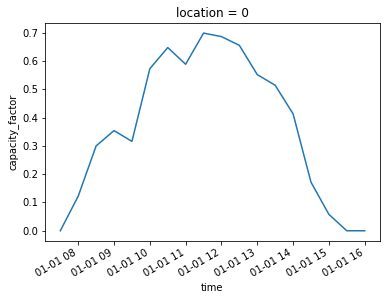

In [27]:
out.capacity_factor.plot()

---
# Simulate single location, but only using ERA-5

In [28]:
out = rk.solar.openfield_pv_era5_unvalidated(
    placements=placements, 
    era5_path=rk.TEST_DATA['era5-like'],
    global_solar_atlas_ghi_path=rk.TEST_DATA['gsa-ghi-like.tif'],
    global_solar_atlas_dni_path=rk.TEST_DATA['gsa-dni-like.tif'],
    module='WINAICO WSx-240P6', # Module to use for simulation
)

print("Output is of type:", type(out))
print("Variables in output:")
for i,var in enumerate(list(out.variables)):
    print(" {i:2d}: {name:30s} - Dimensions:{dim}".format(i=i, name=var, dim=out[var].dims) )

Output is of type: <class 'xarray.core.dataset.Dataset'>
Variables in output:
  0: location                       - Dimensions:('location',)
  1: lon                            - Dimensions:('location',)
  2: lat                            - Dimensions:('location',)
  3: tilt                           - Dimensions:('location',)
  4: azimuth                        - Dimensions:('location',)
  5: capacity                       - Dimensions:('location',)
  6: elev                           - Dimensions:('location',)
  7: time                           - Dimensions:('time',)
  8: global_horizontal_irradiance   - Dimensions:('time', 'location')
  9: direct_horizontal_irradiance   - Dimensions:('time', 'location')
 10: surface_wind_speed             - Dimensions:('time', 'location')
 11: surface_pressure               - Dimensions:('time', 'location')
 12: surface_air_temperature        - Dimensions:('time', 'location')
 13: surface_dew_temperature        - Dimensions:('time', 'location')
 1

C:\Users\s.ryberg\AppData\Local\Continuum\anaconda3\envs\reskit\lib\site-packages\pvlib\irradiance.py:1056: RuntimeWarning: divide by zero encountered in true_divide
  eps = ((dhi + dni) / dhi + kappa * (z ** 3)) / (1 + kappa * (z ** 3))


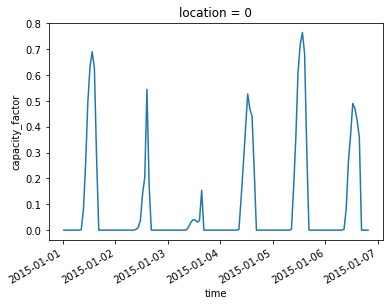

In [30]:
out.capacity_factor.fillna(0).plot()

---
## Single Location with Tracking

In [31]:
out = rk.solar.openfield_pv_era5_unvalidated(
    placements=placements, 
    era5_path=rk.TEST_DATA['era5-like'],
    global_solar_atlas_ghi_path=rk.TEST_DATA['gsa-ghi-like.tif'],
    global_solar_atlas_dni_path=rk.TEST_DATA['gsa-dni-like.tif'],
    module='WINAICO WSx-240P6', # Module to use for simulation
    tracking="single_axis"
)

C:\Users\s.ryberg\AppData\Local\Continuum\anaconda3\envs\reskit\lib\site-packages\pvlib\irradiance.py:1056: RuntimeWarning: divide by zero encountered in true_divide
  eps = ((dhi + dni) / dhi + kappa * (z ** 3)) / (1 + kappa * (z ** 3))


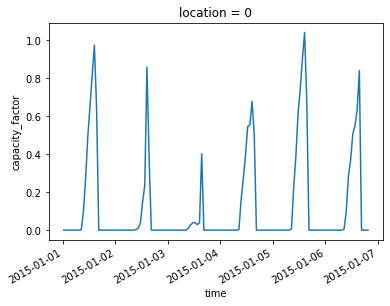

In [32]:
out.capacity_factor.fillna(0).plot()

---
## Simulating multiple locations is the same as simulating a single location
- It is recommended to simulate multiple locations at once!

In [40]:
# Make a placements dataframe
placements = pd.DataFrame()
placements['lon'] = [  6.083,  6.090,  6.095,  6.100,  6.105, ]    # Longitude
placements['lat'] = [ 50.775, 50.780, 50.785, 50.790, 50.795, ]    # Latitude
placements['tilt'] = [    32,     25,     20,     35,     40, ]    # System tilt in degrees
placements['azimuth'] = [180,    180,    180,    180,    180, ]    # System azimuth in degrees
placements['capacity'] = [ 2000, 2000,  2000,   2000,   2000, ]    # Total system capacity in kW
placements['elev'] = [   250,    300,    350,   1000,   -100, ]    # Altitute in meters

placements

,lon,lat,tilt,azimuth,capacity,elev
0,6.083,50.775,32,180,2000,250
1,6.090,50.780,25,180,2000,300
2,6.095,50.785,20,180,2000,350
3,6.100,50.790,35,180,2000,1000
4,6.105,50.795,40,180,2000,-100


In [41]:
# Do simulation
out = rk.solar.openfield_pv_era5_unvalidated(
    placements=placements, 
    era5_path=rk.TEST_DATA['era5-like'],
    global_solar_atlas_ghi_path=rk.TEST_DATA['gsa-ghi-like.tif'],
    global_solar_atlas_dni_path=rk.TEST_DATA['gsa-dni-like.tif'],
    module='WINAICO WSx-240P6', # Module to use for simulation
)

C:\Users\s.ryberg\AppData\Local\Continuum\anaconda3\envs\reskit\lib\site-packages\pvlib\irradiance.py:1056: RuntimeWarning: divide by zero encountered in true_divide
  eps = ((dhi + dni) / dhi + kappa * (z ** 3)) / (1 + kappa * (z ** 3))


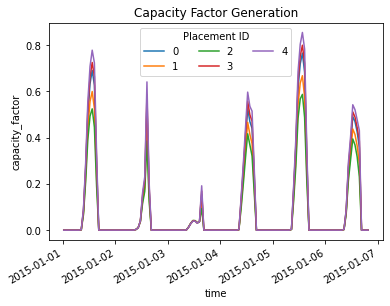

In [50]:
plt.figure(figsize=(6,4))
for i in range(placements.shape[0]):
    out.capacity_factor[:,i].fillna(0).plot(label=i)

plt.legend(ncol=3, title="Placement ID")
plt.title("Capacity Factor Generation")
plt.show()